In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import numpy as np

In [ ]:
vocab_size = 10000
max_len = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

print("Training samples:", len(x_train))
print("Test samples:", len(x_test))
print("Example review:", x_train[0])
print("Label:", y_train[0])


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Test samples: 25000
Example review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 

In [ ]:
x_train_padded = pad_sequences(x_train, maxlen=max_len, padding='post')
x_test_padded = pad_sequences(x_test, maxlen=max_len, padding='post')

print("Padded review shape:", x_train_padded.shape)

Padded review shape: (25000, 200)


In [ ]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x_train_padded, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 65s 398ms/step - accuracy: 0.5245 - loss: 0.6914 - val_accuracy: 0.5648 - val_loss: 0.6812
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 364ms/step - accuracy: 0.5999 - loss: 0.6604 - val_accuracy: 0.6078 - val_loss: 0.6107
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 361ms/step - accuracy: 0.6719 - loss: 0.5607 - val_accuracy: 0.5978 - val_loss: 0.6224
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 366ms/step - accuracy: 0.6726 - loss: 0.5432 - val_accuracy: 0.8294 - val_loss: 0.4544
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 381ms/step - accuracy: 0.8130 - loss: 0.4330 - val_accuracy: 0.8078 - val_loss: 0.4753


In [ ]:
test_loss, test_acc = model.evaluate(x_test_padded, y_test)
print(f"Test accuracy: {test_acc:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8127 - loss: 0.4722
Test accuracy: 0.81


In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

sample = x_test[1]
decoded = decode_review(sample)
print("Sample review:", decoded)

prediction = model.predict(pad_sequences([sample], maxlen=max_len, padding='post'))
print("Prediction:", "Positive" if prediction[0][0] > 0.5 else "Negative")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Sample review: ? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances ? the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere ? with sexual tension and psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the ? moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual ?

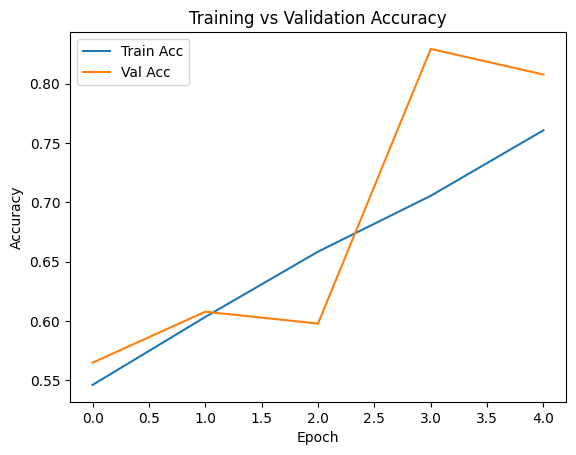

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

In [ ]:
model.save("sentiment_model.h5")

In [ ]:
from google.colab import files
files.download('sentiment_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import json
with open("word_index.json", "w") as f:
    json.dump(imdb.get_word_index(), f)

In [ ]:
from google.colab import files
files.download('word_index.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>